In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import plotly.graph_objects as go

dimension de X:  (2, 100)
dimension de y:  (1, 100)


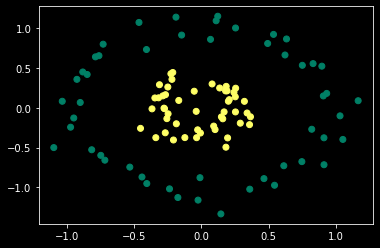

In [124]:
X,y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X= X.T
y = y.reshape((1,y.shape[0]))

print('dimension de X: ', X.shape)
print('dimension de y: ',y.shape)

plt.scatter(X[0,:],X[1,:],c=y,cmap='summer')

In [125]:
def init(n0,n1,n2):
    W1=np.random.randn(n1,n0)
    b1=np.zeros((n1,1))
    W2=np.random.randn(n2,n1)
    b2=np.zeros((n2,1))
    param = { 'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return param

In [126]:
def forward_propagation(X,param):
    W1 = param['W1']
    b1 = param['b1']
    W2 = param['W2']
    b2 = param['b2']
    Z1 = W1.dot(X) + b1
    a1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(a1) + b2
    a2 = 1 / (1 + np.exp(-Z2))

    activation = { 'a1':a1, 'a2':a2}
    return activation

In [357]:
def contour(param):
    lim = 1.2
    h = 100
    W1 = np.linspace(-lim,lim,h)
    W2 = np.linspace(-lim,lim,h)
    W11, W22 = np.meshgrid(W1,W2)

    W_Final = np.c_[W11.ravel(),W22.ravel()].T

    Z = (predict(W_Final,param)+0).reshape(W11.shape)

    return W11,W22,Z

In [294]:
def back_propagation(X,y,activation,param ):
    a1 = activation['a1']
    a2 = activation['a2']
    W2 = param['W2']
    m = y.shape[1]

    dZ2 = a2 -y
    dW2 = 1/m * dZ2.dot(a1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T,dZ2) * a1 * (1-a1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = { 'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2}

    return gradients

In [295]:
def update(gradients,param,lr):
    W1=param['W1']
    W2=param['W2']
    b1=param['b1']
    b2=param['b2']

    dW1=gradients['dW1']
    db1=gradients['db1']
    dW2=gradients['dW2']
    db2=gradients['db2']

    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2

    param = { 'W1':W1, 'W2':W2, 'b1':b1 , 'b2':b2}
    return param

In [296]:
def predict(X, param):
    activation = forward_propagation(X,param)
    a = activation['a2']
    return a>=0.5

In [402]:
def neural_network(X,y,n1=32,lr=0.1,n_iter=1000): #n1 nombre d neurones de la couche 1
    #init W,b
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    param = init(n0,n1,n2)
    
    history = []
    train_Loss = []
    train_acc = []

    
    for i in tqdm(range(n_iter)):
        activation = forward_propagation(X,param)
        a = activation['a2']
        # Err.append(log_Error(a,y))
        if i%10 ==0:
            train_Loss.append(log_loss(y.flatten(),a.flatten()))
            y_pred = predict(X,param)
            train_acc.append(accuracy_score(y.flatten(),y_pred.flatten()))
            # train_acc.append(current_accuracy)
            history.append([param.copy(), train_Loss, train_acc, i])
        
        # mise a jour
        gradients = back_propagation( X, y, activation, param)
        param = update(gradients, param, lr)
    
    W11,W22,Z = contour(param)

    plt.figure(figsize=(18,4))
    plt.subplot(131)
    plt.plot(train_Loss,label='Train Loss',c='y')
    plt.legend()
    plt.subplot(132)
    plt.plot(train_acc, label='Train Accuracy', c='y')
    plt.legend()
    plt.subplot(133)
    plt.scatter(X[0,:],X[1,:],c=y,cmap='winter')
    plt.contourf(W11,W22,Z,10, cmap='magma',alpha=0.2)
    # plt.colorbar()
    plt.show()
    
    # print(a.shape,a)
    return param

100%|██████████| 1000/1000 [00:00<00:00, 7945.35it/s]


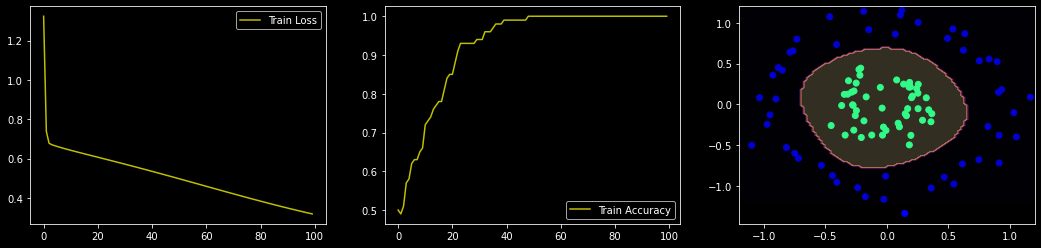

In [403]:
W_param = neural_network(X,y,n1=16,lr=0.1,n_iter=1000)
# print (W_param)

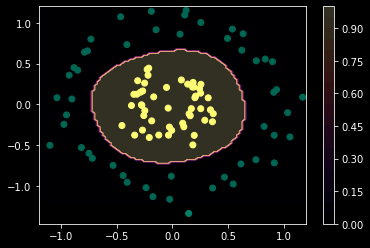

In [355]:
lim = 1.2
h = 100
W1 = np.linspace(-lim,lim,h)
W2 = np.linspace(-lim,lim,h)
W11, W22 = np.meshgrid(W1,W2)

W_Final = np.c_[W11.ravel(),W22.ravel()].T

Z = (predict(W_Final,W_param)+0).reshape(W11.shape)

# plt.contourf(W11,W22,E,20, cmap='magma')
plt.scatter(X[0,:],X[1,:],c=y,cmap='summer')
plt.contourf(W11,W22,Z,20, cmap='magma',alpha=0.2)
plt.colorbar()